In [92]:
import scipy.sparse as spsp
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eigh,eig

# 3. Self-consistent field

- as we move to multi-eletron atoms, we are faced with the issue of electron-electron interactions, which is at the heart of almost all the unsolved problems in our field. 

### Goal: 
- explain the `self-consistent field (SCF)` procedure, which provides an approximate way to include electron-electron interactions into the Schrodinger equation
- the interpretation of the energy levels obtained from this so-called "one-electron" Schrodinger equations
- the energetic considerations underlying the process by which atoms "bond" to form molecules

In [93]:
def hamiltonian(Uscf,N,L):
    # Constant (all MKS, except energy which is in eV)
    hbar = 1.0545718e-34
    m = 9.10938356e-31
    q = 1.6021766208e-19
    ep = 8.85e-12
    
    # lattice 
    a = (L*2)/N
    r = np.arange(1,N+1)*a
    t0 = (hbar**2/(2*m*a**2))/q
    
    # Hamiltonian, H = Kinetic,T + Potential,U + Uscf 
    T = np.diagflat([-t0]*(N-1),-1) + np.diagflat([2*t0]*N,0) + np.diagflat([-t0]*(N-1),1)
    UN = (-q*2./(4*np.pi*ep))/r  # Z=2 for Helium
   
    return T+np.diag(UN+Uscf)


# Figure 3.1.5 (a)

In [94]:
# arbitrary variables
N = 200
change = 1
ctr = 0

# physical parameters
hbar = 1.0545718e-34
m = 9.10938356e-31
q = 1.6021766208e-19
ep = 8.85e-12
L = 5e-10

# lattice 
a = (L*2)/N
r = np.arange(1,N+1)*a

# initialized self-consistent field
Uscf = np.zeros(N)

# calculation of the self-consistent field
while change > 0.01:
    H = hamiltonian(Uscf,N,L)
    E,wavefunctions = eigh(H) # eigenvalues are ranked already from lowest to highest 
    E = E[0]
    psi = wavefunctions[:,0]
    P = psi*np.conj(psi)
    Unew = (q/(4*np.pi*ep))*((sum(P/r)-np.cumsum(P/r))+(np.cumsum(P)/r))
    change = sum(abs(Unew - Uscf))/N
    print(f'{ctr}: {change}')
    Uscf = Unew
    ctr = ctr+1
    #plt.plot(Unew)

0: 6.209803565311685
1: 0.3481382882635764
2: 0.11149807689655951
3: 0.03255301081382898
4: 0.009808294268987074


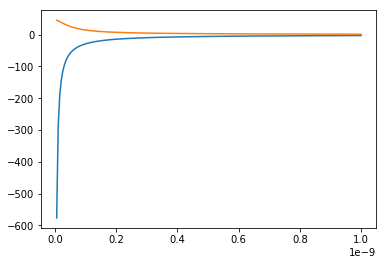

In [95]:
UN = (-q*2./(4*np.pi*ep))/r  # Z=2 for Helium
plt.plot(r,UN)
plt.plot(r,Unew)

# Figure 3.1.5 (b)

In [96]:
def hamiltonian(Uscf,N,L,isc):
    # Constant (all MKS, except energy which is in eV)
    hbar = 1.0545718e-34
    m = 9.10938356e-31
    q = 1.6021766208e-19
    ep = 8.85e-12
    
    # lattice 
    a = (L*2)/N
    r = np.arange(1,N+1)*a
    t0 = (hbar**2/(2*m*a**2))/q
    
    # Hamiltonian, H = Kinetic,T + Potential,U + Uscf 
    T = np.diagflat([-t0]*(N-1),-1) + np.diagflat([2*t0]*N,0) + np.diagflat([-t0]*(N-1),1)
    UN = (-q*2./(4*np.pi*ep))/r  # Z=2 for Helium
    
    l = 1
    Ul = l*(l+1)*(hbar**2)/(2*m*q*(r**2))
    if isc == 0:
        H=T+np.diag(UN+Uscf)
    elif isc == 1:
        H = T+np.diag(UN+Ul+Uscf)
    return H

[180.85997507 180.13679287 177.38600081 173.5948392  169.346224
 164.96499424 160.61624083 156.37164804 152.25405325 148.26611874
 144.40638604 140.67547142 137.07600491 133.61024792 130.27815707
 127.076834   124.00105579 121.04423904 118.19936157 115.45963085
 112.8188708  110.27168029 107.81343672 105.44020948 103.14863111
 100.93575781  98.7989382   96.73570011  94.74365954  92.82045226
  90.96368656  89.17091466  87.43962023  85.76721909  84.15107084
  82.5884992   81.07681905  79.61336845  78.1955437   76.8208356
  75.48686452  74.19141206  72.93244676  71.70814161  70.51688181
  69.35726191  68.22807284  67.12828038  66.05699754  65.01345384
  63.99696445  63.00690179  62.04267133  61.10369251  60.18938517
  59.29916085  58.43241842  57.58854305  56.7669075   55.96687512
  55.18780356  54.42904898  53.68997004  52.9699318   52.26830895
  51.58448869  50.917873    50.26788038  49.63394716  49.01552834
  48.41209812  47.82315008  47.24819713  46.68677126  46.13842314
  45.6027216 

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
19: 25.763148947708302
[-143.34354719 -142.72844909 -140.12924751 -136.50662536 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -2

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
33: 25.763148947675717
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -2

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
51: 25.763148947674928
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -2

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
68: 25.763148947674733
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
84: 25.763148947675276
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
100: 25.763148947674726
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
117: 25.763148947674075
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
132: 25.763148947674548
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
148: 25.763148947674967
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
165: 25.763148947674413
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
180: 25.763148947674896
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
197: 25.76314894767446
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -2

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
213: 25.763148947676473
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
224: 25.76314894767464
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
240: 25.763148947673454
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -23.65614363
  -23.08802456  -22.53499605  -21.9966619   -21.47263563  -20.96253699
  -20.46

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
262: 25.763148947673713
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
276: 25.76314894767474
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
290: 25.76314894767576
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
305: 25.76314894767347
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -2

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
319: 25.763148947674658
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
334: 25.763148947674445
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

349: 25.763148947673645
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -23.65614363
  -23.08802456  -22.53499605  -21.9966619   -21.4726356

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
364: 25.76314894767448
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
380: 25.76314894767453
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263

394: 25.76314894767545
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263563  20.96253699
  20.46598942  19.98261835  19.51205019  19.05391201  1

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
408: 25.763148947674548
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
422: 25.76314894767417
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
433: 25.76314894767461
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -2

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
444: 25.763148947676054
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
454: 25.76314894767623
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
465: 25.76314894767432
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -2

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
477: 25.763148947674818
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
491: 25.763148947674825
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
504: 25.763148947674424
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
517: 25.763148947676036
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
531: 25.763148947674694
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

543: 25.763148947674555
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -23.65614363
  -23.08802456  -22.53499605  -21.9966619   -21.4726356

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
557: 25.763148947673486
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
570: 25.763148947672935
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
584: 25.76314894767432
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
597: 25.763148947675287
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
611: 25.763148947674566
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263563  20.96253699
  20.46598942  19.98261835  19.51205019  19.05391201  18.60783147
  18.1734373

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
638: 25.763148947674157
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263563  20.96253699
  20.46598942  19.98261835  19.51205019  19.05391201  18.60783147
  18.1734373

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
666: 25.763148947675123
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
680: 25.763148947674473
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
694: 25.763148947674914
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263563  20.96253699
  20.46598942  19.98261835  19.51205019  19.05391201  18.60783147
  18.1734373

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
720: 25.763148947674946
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
734: 25.763148947674626
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
747: 25.763148947674768
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
760: 25.7631489476735
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.472635

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
772: 25.76314894767436
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
786: 25.763148947675205
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
799: 25.763148947673912
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
812: 25.76314894767488
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263

[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.47263563  20.96253699
  20.46598942  19.98261835  19.51205019  19.05391201  18.60783147
  18.1734373

[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -23.65614363
  -23.08802456  -22.53499605  -21.9966619   -21.47263563  -20.96253699
  -20.46

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
853: 25.763148947674527
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
865: 25.76314894767412
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -2

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
878: 25.763148947675226
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
891: 25.763148947674757
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
903: 25.763148947674757
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -

   0.66035964   0.57150395   0.47302017   0.36134595   0.22747713]
915: 25.76314894767485
[-143.34354719 -142.72844909 -140.12924751 -136.50662535 -132.42999603
 -128.2191654  -124.03911188 -119.96351111 -116.01714647 -112.20328553
 -108.51949981 -104.96452548 -101.53915878  -98.24449766  -95.08009668
  -92.0431652   -89.12877624  -86.33059668  -83.64169587  -81.0551943
  -78.56468388  -76.16444263  -73.849498    -71.61559371  -69.45910396
  -67.37692546  -65.36636702  -63.42504753  -61.55080812  -59.74164029
  -57.99562964  -56.31091403  -54.68565387  -53.11801271  -51.60614587
  -50.1481954   -48.74228966  -47.38654632  -46.07907758  -44.8179968
  -43.6014259   -42.42750312  -41.29439066  -40.20028212  -39.14340954
  -38.12205004  -37.13453193  -36.17924049  -35.25462322  -34.35919472
  -33.49154109  -32.65032385  -31.83428319  -31.04224049  -30.27309985
  -29.52584852  -28.799556    -28.09337173  -27.40652129  -26.73830127
  -26.08807293  -25.45525489  -24.83931528  -24.23976376  -2

   -0.66035964   -0.57150395   -0.47302017   -0.36134595   -0.22747713]
928: 25.763148947674964
[143.34354719 142.72844909 140.12924751 136.50662535 132.42999603
 128.2191654  124.03911188 119.96351111 116.01714647 112.20328553
 108.51949981 104.96452548 101.53915878  98.24449766  95.08009668
  92.0431652   89.12877624  86.33059668  83.64169587  81.0551943
  78.56468388  76.16444263  73.849498    71.61559371  69.45910396
  67.37692546  65.36636702  63.42504753  61.55080812  59.74164029
  57.99562964  56.31091403  54.68565387  53.11801271  51.60614587
  50.1481954   48.74228966  47.38654632  46.07907758  44.8179968
  43.6014259   42.42750312  41.29439066  40.20028212  39.14340954
  38.12205004  37.13453193  36.17924049  35.25462322  34.35919472
  33.49154109  32.65032385  31.83428319  31.04224049  30.27309985
  29.52584852  28.799556    28.09337173  27.40652129  26.73830127
  26.08807293  25.45525489  24.83931528  24.23976376  23.65614363
  23.08802456  22.53499605  21.9966619   21.4726

KeyboardInterrupt: 

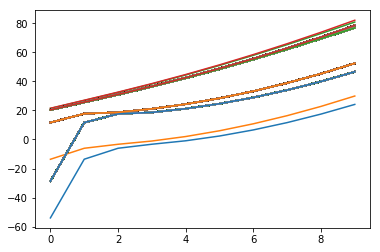

In [100]:
# arbitrary variables
N = 200
change = 1
ctr = 0

# physical parameters
hbar = 1.0545718e-34
m = 9.10938356e-31
q = 1.6021766208e-19
ep = 8.85e-12
L = 5e-10

# lattice 
a = (L*2)/N
r = np.arange(1,N+1)*a

# initialized self-consistent field
Uscf = np.zeros(N)

# calculation of the self-consistent field
while change > 0.1:
    #print(Uscf)
    H = hamiltonian(Uscf,N,L,0)
    E,wavefunctions = eigh(H) # eigenvalues are ranked already from lowest to highest 
    plt.plot(E[:10])
    E1s = E[0]; psi = wavefunctions[:,0]; P1s = psi*np.conj(psi)
    E2s = E[1]; psi = wavefunctions[:,1]; P2s = psi*np.conj(psi)
    E3s = E[2]; psi = wavefunctions[:,2]; P3s = psi*np.conj(psi)
    
    H = hamiltonian(Uscf,N,L,1)
    E,wavefunctions = eigh(H) # eigenvalues are ranked already from lowest to highest 
    plt.plot(E[:10])
    E2p = E[0]; psi = wavefunctions[:,0]; P2p = psi*np.conj(psi)
    E3p = E[1]; psi = wavefunctions[:,1]; P3p = psi*np.conj(psi)
    
    #1s^2,2s^2,2p^6,3s^2,3p^2
    n0 = (2*(P1s+P2s+P3s)) + (6*P2p) + (2*P3p)
    n = n0*(13/14)   # (Z-1)/Z = 13/14
    
    Unew = (q/(4*np.pi*ep))*((sum(n/r)-np.cumsum(n/r))+(np.cumsum(n)/r))
    #b = ((n/(4*np.pi*a*r*r)))**(1/3)
    Uex = (-q/(4*np.pi*ep))*((n/(4*np.pi*a*r*r)))**(1/3)
    Unew = Unew + Uex
    change = sum(abs(Unew - Uscf))/N
    
    Uscf = Unew
    ctr = ctr+1
    #plt.plot(Unew)
    E = [E1s,E2s,E3s,E3p]
    print(f'{ctr}: {change}')

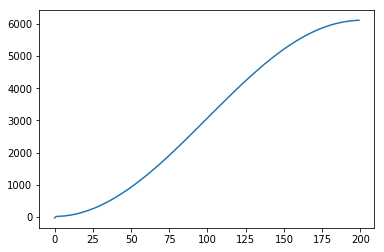

In [89]:
plt.plot(E)

In [4]:
#y00 = np.sqrt(1/(4*np.pi))
#y10 = np.sqrt()
#n = (f1*np.conj(f1)/(r[0]**2))*(y00)**2 + (f2*np.conj(f2)/(r[1]**2))*(y10)**2

In [6]:
f1 = vect[0]
f2 = vect[1]

sigma = (f1*np.conj(f1))**2 + (f2*np.conj(f2))**2
a = 1
Uscf = (Z-1)/Z*(q/(4*np.pi*ep*r))*(a+b)

NameError: name 'q' is not defined

In [ ]:
a = (5e-10)*2/N
r = np.arange(1,N+1)*a

# Figure 3.4.3 (a)

In [124]:
# Constant
hbar = 1.055e-34
q=1.602e-19
I0 = q*q/hbar 

# Parameters 
U0 = 0.25 # U0 is 0.25 for part (a) and 0.025 for part (b)
kT = 0.025
mu = 0
ep = 0.2 
g1 = 0.005
g2 = 0.005
g = g1 + g2 
alphag = 1
alphad = 0.5 

# Bias 
IV = 101 
VV = np.linspace(0,1.5,IV)

# container 
I1 = np.zeros(IV)
I2 = np.zeros(IV)
for iV in range(IV):
    Vg = 0 
    Vd = VV[iV]
    mu1 = mu
    mu2 = mu1-Vd
    #UL = -alphag*Vg-alphad*Vd
    UL = -q*Vd/2
    
    # Multielectron method 
    f1 = 1/(1+np.exp((ep+UL*(-U0/2)-mu1)/kT))
    f2 = 1/(1+np.exp((ep+UL*(-U0/2)-mu2)/kT))

    f1U = 1/(1+np.exp((ep+UL+(U0/2)-mu1)/kT)) 
    f2U = 1/(1+np.exp((ep+UL+(U0/2)-mu2)/kT))
    
    P1 = ((g1*f1)+(g2*f2))/(1e-6+(g1*(1-f1))+(g2*(1-f2)))
    P2 = P1*((g1*f1U)+(g2*f2U))/(1e-6 +(g1*(1-f1U))+(g2*(1-f2U)))
    P0 = 1/(1+P1+P1+P2) # partition function
    P1 = P1*P0
    P2 = P2*P0
    
    I1[iV] = 2*I0*((P0*g1*f1)-(P1*g1*(1-f1))+(P1*g1*f1U)-(P2*g1*(1-f1U)))
    I2[iV] = 2*I0*((P0*g2*f2)-(P1*g2*(1-f2))+(P1*g2*f2U)-(P2*g2*(1-f2U)))



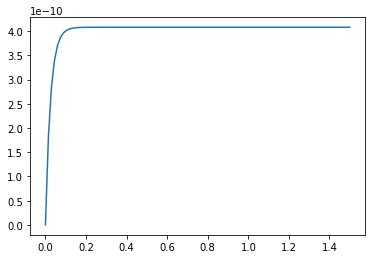

In [125]:
plt.plot(VV,I1)
#plt.plot(I2)

In [142]:
# RSCF method (same as Fig 1.4.6 with added factor of two)
# Energy Grid
NE =501
E = np.linspace(-1,1,NE)
dE = E[1]-E[0]
D = (g/(2*np.pi))/((E**2)+((g/2)**2)) # Lorentzian density of states per eV
D = D/(dE*sum(D)) # normalizing to one

N = np.zeros(IV)
I = np.zeros(IV)
# Bias
for iV in range(IV):
    Vg = 0; Vd = VV[iV]
    #Vd = 0; Vg = VV[iV]
    #mu1 = mu; mu2=mu1-Vd; UL=-alphag*Vg-(alphad*Vd)

    U=0; # Self-consistent Field 
    dU=1

    while dU > 1e-6:
        F1 = 1/(1+np.exp(E+ep+UL+U-mu1)/kT); 
        F2 = 1/(1+np.exp(E+ep+UL+U-mu2)/kT);
        N[iV] = dE*2*sum(D*((F1*g1/g)+(F2*g2/g)))
        Unew = U0*N[iV]
        dU = abs(U-Unew);
        U = U + 0.1*(Unew-U)
        print(dU)
        
    I[iV] = dE*2*I0*(sum(D*(F1-F2)))*(g1*g2/g)

0.04206316292030817
0.037695127379754
0.03378116911255203
0.030273989310379494
0.027131235058003522
0.024314978343474125
0.021791250716225768
0.019529627493765182
0.017502856117707594
0.015686523873261818
0.01405876072488093
0.012599973494797058
0.011292608029100839
0.010120936365157214
0.009070866240685323
0.008129770574067156
0.007286334801980238
0.006530420188207535
0.005852941419902044
0.005245756987640925
0.004701571005901899
0.004213845273392962
0.003776720499965802
0.0033849457403798897
0.003033815176507297
0.0027191114800266605
0.002437055068446374
0.002184258639484897
0.001957686433353971
0.001754617730171347
0.0015726141413127184
0.001409490299651553
0.0012632875949103034
0.0011322506372909366
0.001014806165603517
0.0009095441457059664
0.0008152008315588932
0.0007306435849155149
0.0006548572709060424
0.0005869320657965402
0.00052605253023226
0.00047148781653735816
0.00042258289230309026
0.0003787506747452568
0.0003394649812704445
0.0003042542115246766
0.00027269568499137253
0

0.011292608029100839
0.010120936365157214
0.009070866240685323
0.008129770574067156
0.007286334801980238
0.006530420188207535
0.005852941419902044
0.005245756987640925
0.004701571005901899
0.004213845273392962
0.003776720499965802
0.0033849457403798897
0.003033815176507297
0.0027191114800266605
0.002437055068446374
0.002184258639484897
0.001957686433353971
0.001754617730171347
0.0015726141413127184
0.001409490299651553
0.0012632875949103034
0.0011322506372909366
0.001014806165603517
0.0009095441457059664
0.0008152008315588932
0.0007306435849155149
0.0006548572709060424
0.0005869320657965402
0.00052605253023226
0.00047148781653735816
0.00042258289230309026
0.0003787506747452568
0.0003394649812704445
0.0003042542115246766
0.00027269568499137253
0.0002444105661007709
0.00021905931587369587
0.00019633761545537892
0.00017597271257220604
0.00015772014702290782
0.00014136081587522165
0.00012669834312114409
0.00011355672219937052
0.00010177820307628177
9.122139851217709e-05
8.17595867718332e-0

0.015686523873261818
0.01405876072488093
0.012599973494797058
0.011292608029100839
0.010120936365157214
0.009070866240685323
0.008129770574067156
0.007286334801980238
0.006530420188207535
0.005852941419902044
0.005245756987640925
0.004701571005901899
0.004213845273392962
0.003776720499965802
0.0033849457403798897
0.003033815176507297
0.0027191114800266605
0.002437055068446374
0.002184258639484897
0.001957686433353971
0.001754617730171347
0.0015726141413127184
0.001409490299651553
0.0012632875949103034
0.0011322506372909366
0.001014806165603517
0.0009095441457059664
0.0008152008315588932
0.0007306435849155149
0.0006548572709060424
0.0005869320657965402
0.00052605253023226
0.00047148781653735816
0.00042258289230309026
0.0003787506747452568
0.0003394649812704445
0.0003042542115246766
0.00027269568499137253
0.0002444105661007709
0.00021905931587369587
0.00019633761545537892
0.00017597271257220604
0.00015772014702290782
0.00014136081587522165
0.00012669834312114409
0.00011355672219937052
0.

3.0605555751891944e-06
2.7431045056883208e-06
2.45858052625586e-06
2.2035683283003205e-06
1.9750068501814266e-06
1.7701525344762659e-06
1.586546394566346e-06
1.4219844982343854e-06
1.2744915125831313e-06
1.1422969930507954e-06
1.0238141312929327e-06
9.176207083974597e-07
0.04206316292030817
0.037695127379754
0.03378116911255203
0.030273989310379494
0.027131235058003522
0.024314978343474125
0.021791250716225768
0.019529627493765182
0.017502856117707594
0.015686523873261818
0.01405876072488093
0.012599973494797058
0.011292608029100839
0.010120936365157214
0.009070866240685323
0.008129770574067156
0.007286334801980238
0.006530420188207535
0.005852941419902044
0.005245756987640925
0.004701571005901899
0.004213845273392962
0.003776720499965802
0.0033849457403798897
0.003033815176507297
0.0027191114800266605
0.002437055068446374
0.002184258639484897
0.001957686433353971
0.001754617730171347
0.0015726141413127184
0.001409490299651553
0.0012632875949103034
0.0011322506372909366
0.0010148061656

0.00052605253023226
0.00047148781653735816
0.00042258289230309026
0.0003787506747452568
0.0003394649812704445
0.0003042542115246766
0.00027269568499137253
0.0002444105661007709
0.00021905931587369587
0.00019633761545537892
0.00017597271257220604
0.00015772014702290782
0.00014136081587522165
0.00012669834312114409
0.00011355672219937052
0.00010177820307628177
9.122139851217709e-05
8.17595867718332e-05
7.327919040136383e-05
6.567841280432501e-05
5.886601624733451e-05
5.2760226624815054e-05
4.72877518304729e-05
4.2382901953776086e-05
3.798680073605065e-05
3.404667882135615e-05
3.0515240315789893e-05
2.73500950526695e-05
2.451324974580421e-05
2.1970651925225237e-05
1.969178117663256e-05
1.7649282781341535e-05
1.581863935640193e-05
1.4177876554256896e-05
1.2707299288407248e-05
1.1389255319134428e-05
1.0207923361503501e-05
9.149123171528495e-06
8.200145330733433e-06
7.349598686957892e-06
6.587273618581524e-06
5.904019481757505e-06
5.291634769484521e-06
4.742768663933139e-06
4.25083279888272e

2.73500950526695e-05
2.451324974580421e-05
2.1970651925225237e-05
1.969178117663256e-05
1.7649282781341535e-05
1.581863935640193e-05
1.4177876554256896e-05
1.2707299288407248e-05
1.1389255319134428e-05
1.0207923361503501e-05
9.149123171528495e-06
8.200145330733433e-06
7.349598686957892e-06
6.587273618581524e-06
5.904019481757505e-06
5.291634769484521e-06
4.742768663933139e-06
4.25083279888272e-06
3.809922176918612e-06
3.4147442868892597e-06
3.0605555751891944e-06
2.7431045056883208e-06
2.45858052625586e-06
2.2035683283003205e-06
1.9750068501814266e-06
1.7701525344762659e-06
1.586546394566346e-06
1.4219844982343854e-06
1.2744915125831313e-06
1.1422969930507954e-06
1.0238141312929327e-06
9.176207083974597e-07
0.04206316292030817
0.037695127379754
0.03378116911255203
0.030273989310379494
0.027131235058003522
0.024314978343474125
0.021791250716225768
0.019529627493765182
0.017502856117707594
0.015686523873261818
0.01405876072488093
0.012599973494797058
0.011292608029100839
0.01012093636515

0.003776720499965802
0.0033849457403798897
0.003033815176507297
0.0027191114800266605
0.002437055068446374
0.002184258639484897
0.001957686433353971
0.001754617730171347
0.0015726141413127184
0.001409490299651553
0.0012632875949103034
0.0011322506372909366
0.001014806165603517
0.0009095441457059664
0.0008152008315588932
0.0007306435849155149
0.0006548572709060424
0.0005869320657965402
0.00052605253023226
0.00047148781653735816
0.00042258289230309026
0.0003787506747452568
0.0003394649812704445
0.0003042542115246766
0.00027269568499137253
0.0002444105661007709
0.00021905931587369587
0.00019633761545537892
0.00017597271257220604
0.00015772014702290782
0.00014136081587522165
0.00012669834312114409
0.00011355672219937052
0.00010177820307628177
9.122139851217709e-05
8.17595867718332e-05
7.327919040136383e-05
6.567841280432501e-05
5.886601624733451e-05
5.2760226624815054e-05
4.72877518304729e-05
4.2382901953776086e-05
3.798680073605065e-05
3.404667882135615e-05
3.0515240315789893e-05
2.735009

0.00052605253023226
0.00047148781653735816
0.00042258289230309026
0.0003787506747452568
0.0003394649812704445
0.0003042542115246766
0.00027269568499137253
0.0002444105661007709
0.00021905931587369587
0.00019633761545537892
0.00017597271257220604
0.00015772014702290782
0.00014136081587522165
0.00012669834312114409
0.00011355672219937052
0.00010177820307628177
9.122139851217709e-05
8.17595867718332e-05
7.327919040136383e-05
6.567841280432501e-05
5.886601624733451e-05
5.2760226624815054e-05
4.72877518304729e-05
4.2382901953776086e-05
3.798680073605065e-05
3.404667882135615e-05
3.0515240315789893e-05
2.73500950526695e-05
2.451324974580421e-05
2.1970651925225237e-05
1.969178117663256e-05
1.7649282781341535e-05
1.581863935640193e-05
1.4177876554256896e-05
1.2707299288407248e-05
1.1389255319134428e-05
1.0207923361503501e-05
9.149123171528495e-06
8.200145330733433e-06
7.349598686957892e-06
6.587273618581524e-06
5.904019481757505e-06
5.291634769484521e-06
4.742768663933139e-06
4.25083279888272e

9.149123171528495e-06
8.200145330733433e-06
7.349598686957892e-06
6.587273618581524e-06
5.904019481757505e-06
5.291634769484521e-06
4.742768663933139e-06
4.25083279888272e-06
3.809922176918612e-06
3.4147442868892597e-06
3.0605555751891944e-06
2.7431045056883208e-06
2.45858052625586e-06
2.2035683283003205e-06
1.9750068501814266e-06
1.7701525344762659e-06
1.586546394566346e-06
1.4219844982343854e-06
1.2744915125831313e-06
1.1422969930507954e-06
1.0238141312929327e-06
9.176207083974597e-07
0.04206316292030817
0.037695127379754
0.03378116911255203
0.030273989310379494
0.027131235058003522
0.024314978343474125
0.021791250716225768
0.019529627493765182
0.017502856117707594
0.015686523873261818
0.01405876072488093
0.012599973494797058
0.011292608029100839
0.010120936365157214
0.009070866240685323
0.008129770574067156
0.007286334801980238
0.006530420188207535
0.005852941419902044
0.005245756987640925
0.004701571005901899
0.004213845273392962
0.003776720499965802
0.0033849457403798897
0.0030338

0.0003787506747452568
0.0003394649812704445
0.0003042542115246766
0.00027269568499137253
0.0002444105661007709
0.00021905931587369587
0.00019633761545537892
0.00017597271257220604
0.00015772014702290782
0.00014136081587522165
0.00012669834312114409
0.00011355672219937052
0.00010177820307628177
9.122139851217709e-05
8.17595867718332e-05
7.327919040136383e-05
6.567841280432501e-05
5.886601624733451e-05
5.2760226624815054e-05
4.72877518304729e-05
4.2382901953776086e-05
3.798680073605065e-05
3.404667882135615e-05
3.0515240315789893e-05
2.73500950526695e-05
2.451324974580421e-05
2.1970651925225237e-05
1.969178117663256e-05
1.7649282781341535e-05
1.581863935640193e-05
1.4177876554256896e-05
1.2707299288407248e-05
1.1389255319134428e-05
1.0207923361503501e-05
9.149123171528495e-06
8.200145330733433e-06
7.349598686957892e-06
6.587273618581524e-06
5.904019481757505e-06
5.291634769484521e-06
4.742768663933139e-06
4.25083279888272e-06
3.809922176918612e-06
3.4147442868892597e-06
3.060555575189194

0.005245756987640925
0.004701571005901899
0.004213845273392962
0.003776720499965802
0.0033849457403798897
0.003033815176507297
0.0027191114800266605
0.002437055068446374
0.002184258639484897
0.001957686433353971
0.001754617730171347
0.0015726141413127184
0.001409490299651553
0.0012632875949103034
0.0011322506372909366
0.001014806165603517
0.0009095441457059664
0.0008152008315588932
0.0007306435849155149
0.0006548572709060424
0.0005869320657965402
0.00052605253023226
0.00047148781653735816
0.00042258289230309026
0.0003787506747452568
0.0003394649812704445
0.0003042542115246766
0.00027269568499137253
0.0002444105661007709
0.00021905931587369587
0.00019633761545537892
0.00017597271257220604
0.00015772014702290782
0.00014136081587522165
0.00012669834312114409
0.00011355672219937052
0.00010177820307628177
9.122139851217709e-05
8.17595867718332e-05
7.327919040136383e-05
6.567841280432501e-05
5.886601624733451e-05
5.2760226624815054e-05
4.72877518304729e-05
4.2382901953776086e-05
3.7986800736

7.327919040136383e-05
6.567841280432501e-05
5.886601624733451e-05
5.2760226624815054e-05
4.72877518304729e-05
4.2382901953776086e-05
3.798680073605065e-05
3.404667882135615e-05
3.0515240315789893e-05
2.73500950526695e-05
2.451324974580421e-05
2.1970651925225237e-05
1.969178117663256e-05
1.7649282781341535e-05
1.581863935640193e-05
1.4177876554256896e-05
1.2707299288407248e-05
1.1389255319134428e-05
1.0207923361503501e-05
9.149123171528495e-06
8.200145330733433e-06
7.349598686957892e-06
6.587273618581524e-06
5.904019481757505e-06
5.291634769484521e-06
4.742768663933139e-06
4.25083279888272e-06
3.809922176918612e-06
3.4147442868892597e-06
3.0605555751891944e-06
2.7431045056883208e-06
2.45858052625586e-06
2.2035683283003205e-06
1.9750068501814266e-06
1.7701525344762659e-06
1.586546394566346e-06
1.4219844982343854e-06
1.2744915125831313e-06
1.1422969930507954e-06
1.0238141312929327e-06
9.176207083974597e-07
0.04206316292030817
0.037695127379754
0.03378116911255203
0.030273989310379494
0.02

0.0015726141413127184
0.001409490299651553
0.0012632875949103034
0.0011322506372909366
0.001014806165603517
0.0009095441457059664
0.0008152008315588932
0.0007306435849155149
0.0006548572709060424
0.0005869320657965402
0.00052605253023226
0.00047148781653735816
0.00042258289230309026
0.0003787506747452568
0.0003394649812704445
0.0003042542115246766
0.00027269568499137253
0.0002444105661007709
0.00021905931587369587
0.00019633761545537892
0.00017597271257220604
0.00015772014702290782
0.00014136081587522165
0.00012669834312114409
0.00011355672219937052
0.00010177820307628177
9.122139851217709e-05
8.17595867718332e-05
7.327919040136383e-05
6.567841280432501e-05
5.886601624733451e-05
5.2760226624815054e-05
4.72877518304729e-05
4.2382901953776086e-05
3.798680073605065e-05
3.404667882135615e-05
3.0515240315789893e-05
2.73500950526695e-05
2.451324974580421e-05
2.1970651925225237e-05
1.969178117663256e-05
1.7649282781341535e-05
1.581863935640193e-05
1.4177876554256896e-05
1.2707299288407248e-05

3.4147442868892597e-06
3.0605555751891944e-06
2.7431045056883208e-06
2.45858052625586e-06
2.2035683283003205e-06
1.9750068501814266e-06
1.7701525344762659e-06
1.586546394566346e-06
1.4219844982343854e-06
1.2744915125831313e-06
1.1422969930507954e-06
1.0238141312929327e-06
9.176207083974597e-07
0.04206316292030817
0.037695127379754
0.03378116911255203
0.030273989310379494
0.027131235058003522
0.024314978343474125
0.021791250716225768
0.019529627493765182
0.017502856117707594
0.015686523873261818
0.01405876072488093
0.012599973494797058
0.011292608029100839
0.010120936365157214
0.009070866240685323
0.008129770574067156
0.007286334801980238
0.006530420188207535
0.005852941419902044
0.005245756987640925
0.004701571005901899
0.004213845273392962
0.003776720499965802
0.0033849457403798897
0.003033815176507297
0.0027191114800266605
0.002437055068446374
0.002184258639484897
0.001957686433353971
0.001754617730171347
0.0015726141413127184
0.001409490299651553
0.0012632875949103034
0.001132250637

3.404667882135615e-05
3.0515240315789893e-05
2.73500950526695e-05
2.451324974580421e-05
2.1970651925225237e-05
1.969178117663256e-05
1.7649282781341535e-05
1.581863935640193e-05
1.4177876554256896e-05
1.2707299288407248e-05
1.1389255319134428e-05
1.0207923361503501e-05
9.149123171528495e-06
8.200145330733433e-06
7.349598686957892e-06
6.587273618581524e-06
5.904019481757505e-06
5.291634769484521e-06
4.742768663933139e-06
4.25083279888272e-06
3.809922176918612e-06
3.4147442868892597e-06
3.0605555751891944e-06
2.7431045056883208e-06
2.45858052625586e-06
2.2035683283003205e-06
1.9750068501814266e-06
1.7701525344762659e-06
1.586546394566346e-06
1.4219844982343854e-06
1.2744915125831313e-06
1.1422969930507954e-06
1.0238141312929327e-06
9.176207083974597e-07
0.04206316292030817
0.037695127379754
0.03378116911255203
0.030273989310379494
0.027131235058003522
0.024314978343474125
0.021791250716225768
0.019529627493765182
0.017502856117707594
0.015686523873261818
0.01405876072488093
0.01259997349

0.002437055068446374
0.002184258639484897
0.001957686433353971
0.001754617730171347
0.0015726141413127184
0.001409490299651553
0.0012632875949103034
0.0011322506372909366
0.001014806165603517
0.0009095441457059664
0.0008152008315588932
0.0007306435849155149
0.0006548572709060424
0.0005869320657965402
0.00052605253023226
0.00047148781653735816
0.00042258289230309026
0.0003787506747452568
0.0003394649812704445
0.0003042542115246766
0.00027269568499137253
0.0002444105661007709
0.00021905931587369587
0.00019633761545537892
0.00017597271257220604
0.00015772014702290782
0.00014136081587522165
0.00012669834312114409
0.00011355672219937052
0.00010177820307628177
9.122139851217709e-05
8.17595867718332e-05
7.327919040136383e-05
6.567841280432501e-05
5.886601624733451e-05
5.2760226624815054e-05
4.72877518304729e-05
4.2382901953776086e-05
3.798680073605065e-05
3.404667882135615e-05
3.0515240315789893e-05
2.73500950526695e-05
2.451324974580421e-05
2.1970651925225237e-05
1.969178117663256e-05
1.7649

0.021791250716225768
0.019529627493765182
0.017502856117707594
0.015686523873261818
0.01405876072488093
0.012599973494797058
0.011292608029100839
0.010120936365157214
0.009070866240685323
0.008129770574067156
0.007286334801980238
0.006530420188207535
0.005852941419902044
0.005245756987640925
0.004701571005901899
0.004213845273392962
0.003776720499965802
0.0033849457403798897
0.003033815176507297
0.0027191114800266605
0.002437055068446374
0.002184258639484897
0.001957686433353971
0.001754617730171347
0.0015726141413127184
0.001409490299651553
0.0012632875949103034
0.0011322506372909366
0.001014806165603517
0.0009095441457059664
0.0008152008315588932
0.0007306435849155149
0.0006548572709060424
0.0005869320657965402
0.00052605253023226
0.00047148781653735816
0.00042258289230309026
0.0003787506747452568
0.0003394649812704445
0.0003042542115246766
0.00027269568499137253
0.0002444105661007709
0.00021905931587369587
0.00019633761545537892
0.00017597271257220604
0.00015772014702290782
0.000141

0.00011355672219937052
0.00010177820307628177
9.122139851217709e-05
8.17595867718332e-05
7.327919040136383e-05
6.567841280432501e-05
5.886601624733451e-05
5.2760226624815054e-05
4.72877518304729e-05
4.2382901953776086e-05
3.798680073605065e-05
3.404667882135615e-05
3.0515240315789893e-05
2.73500950526695e-05
2.451324974580421e-05
2.1970651925225237e-05
1.969178117663256e-05
1.7649282781341535e-05
1.581863935640193e-05
1.4177876554256896e-05
1.2707299288407248e-05
1.1389255319134428e-05
1.0207923361503501e-05
9.149123171528495e-06
8.200145330733433e-06
7.349598686957892e-06
6.587273618581524e-06
5.904019481757505e-06
5.291634769484521e-06
4.742768663933139e-06
4.25083279888272e-06
3.809922176918612e-06
3.4147442868892597e-06
3.0605555751891944e-06
2.7431045056883208e-06
2.45858052625586e-06
2.2035683283003205e-06
1.9750068501814266e-06
1.7701525344762659e-06
1.586546394566346e-06
1.4219844982343854e-06
1.2744915125831313e-06
1.1422969930507954e-06
1.0238141312929327e-06
9.17620708397459

0.024314978343474125
0.021791250716225768
0.019529627493765182
0.017502856117707594
0.015686523873261818
0.01405876072488093
0.012599973494797058
0.011292608029100839
0.010120936365157214
0.009070866240685323
0.008129770574067156
0.007286334801980238
0.006530420188207535
0.005852941419902044
0.005245756987640925
0.004701571005901899
0.004213845273392962
0.003776720499965802
0.0033849457403798897
0.003033815176507297
0.0027191114800266605
0.002437055068446374
0.002184258639484897
0.001957686433353971
0.001754617730171347
0.0015726141413127184
0.001409490299651553
0.0012632875949103034
0.0011322506372909366
0.001014806165603517
0.0009095441457059664
0.0008152008315588932
0.0007306435849155149
0.0006548572709060424
0.0005869320657965402
0.00052605253023226
0.00047148781653735816
0.00042258289230309026
0.0003787506747452568
0.0003394649812704445
0.0003042542115246766
0.00027269568499137253
0.0002444105661007709
0.00021905931587369587
0.00019633761545537892
0.00017597271257220604
0.00015772

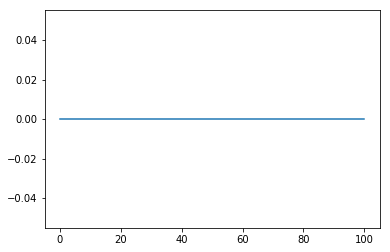

In [143]:
plt.plot(I)